# Airfare Price Prediction

Statement of Issue 
It can be hard to guess airline ticket rates, we might see a fare today, find out the price of the same flight tomorrow, it's going to be a different story. We may have heard travelers sometimes complain that the costs of airline fares are too volatile. As data scientists, we can show that something can be expected provided the correct data. 

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Importing dataset

In [2]:
df = pd.read_excel("flight_fare.xlsx")

# set max coulmns to None so we can see all columns from dataset

In [3]:
pd.set_option('display.max_columns', None)

# show the first five rows

In [4]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Chech basic information of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Dataset Shape

In [6]:
df.shape

(10683, 11)

# Check the value counts of Duration column

In [7]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# check the count of null values in dataset column

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# check the unique values in Route counts

In [9]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

# check unique value in Total_Stops

In [10]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

### There is only one null value in Total_Stops & Route so we can drop null value from data

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Feature extraction

### Now we extract  day values and month values from Date_of_Journey and create two new columns Journey_day &  Journey_month 

In [14]:
df1 = df.copy()

In [15]:
df1["Journey_day"] = pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.day

In [16]:
df1["Journey_month"] = pd.to_datetime(df1["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
df1.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

### so after we create two new column from date_of_journey , now we drop Date_of_Journey column from dataset

In [18]:

df1.drop(["Date_of_Journey"], axis = 1, inplace = True)

### same things we have do with Dep_time column , we create two new column Dep_hour and Dep_min from extract hour and min from Dep_Time

In [19]:

df1["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df1["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [20]:
df1.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

### Similar to Date_of_Journey we can extract values from Arrival_Time


In [21]:

# Extracting Hours
df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour

# Extracting Minutes
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df1.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15  
2       25             4           25  
3        5            23           30  
4       50            21           35

# check the all the values in Duration 

In [23]:

duration = list(df1["Duration"])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

### If duration contains only hour min and if yes add min or hour in it

In [24]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

### Now Extract hour and min from duration column and create two new column Duration_hours & Duration_mins

In [26]:
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [27]:
# Adding duration_hours and duration_mins list to train_data dataframe

df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins

### Now dropping Duration column

In [28]:
df1.drop(["Duration"], axis = 1, inplace = True)

In [29]:
df1.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   
3         No info   6218           12              5        18        5   
4         No info  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

---

## Handling Categorical Data



# check the value counts in Airline

In [30]:
df1["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Display price according to Airline 

In [31]:
# Assuming you have a DataFrame named df with columns 'Airline' and 'Price'

fig = px.bar(df1, x='Airline', y='Price', color='Airline' ,title='Average Price per Airline', height=500)
fig.update_traces(dict(marker_line_width=0))

fig.show()


### Below is the plot of Price fluctuation with respect to days of the months

In [32]:
# Group by month and calculate the average price
avg_price_by_month = df1.groupby('Journey_day')['Price'].mean().reset_index()

# Create the line chart using Plotly
fig = px.line(avg_price_by_month, x='Journey_day', y='Price', 
              labels={'Month': 'Day of the Month', 'Price': 'Average Price'},
              title='Average Price by Month of the Year')
fig.show()

#### here we can say that jet airways price higher than any onther airline

# chech the average price according to Airline 

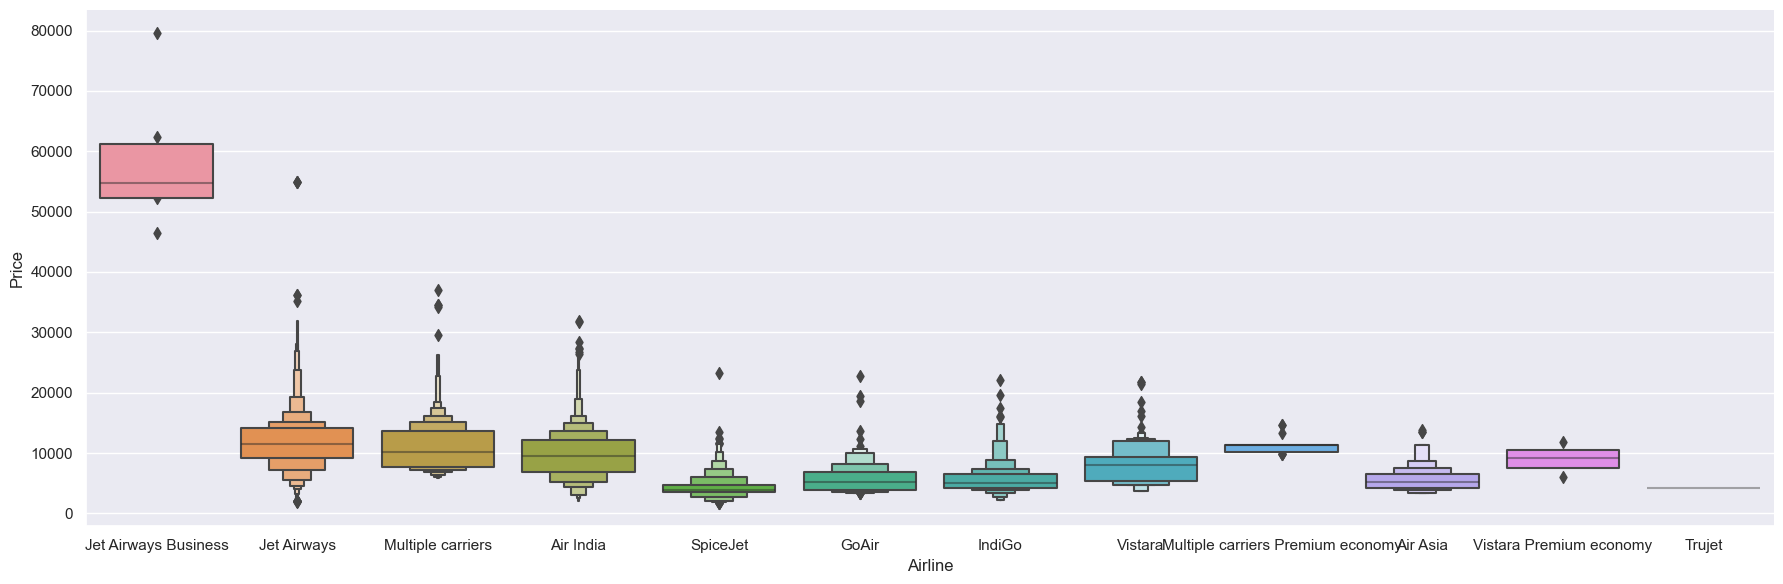

In [33]:

sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [34]:
# Create the boxen plot
fig = px.box(df1.sort_values("Price", ascending=False), y="Price", x="Airline", color='Airline',
             title="Price Distribution per Airline (Boxen Plot)", height=600, width=1000)

# Show the plot
fig.update_layout(width=1100, height=700)

fig.show()

# Now we need to create dummy data for Categorical 

### Airline is Nominal Categorical data we will perform OneHotEncoding

In [35]:

Airline = df1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

### Check the Source values counts 

In [36]:
df1["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# display average price according to source 

<Axes: xlabel='Source'>

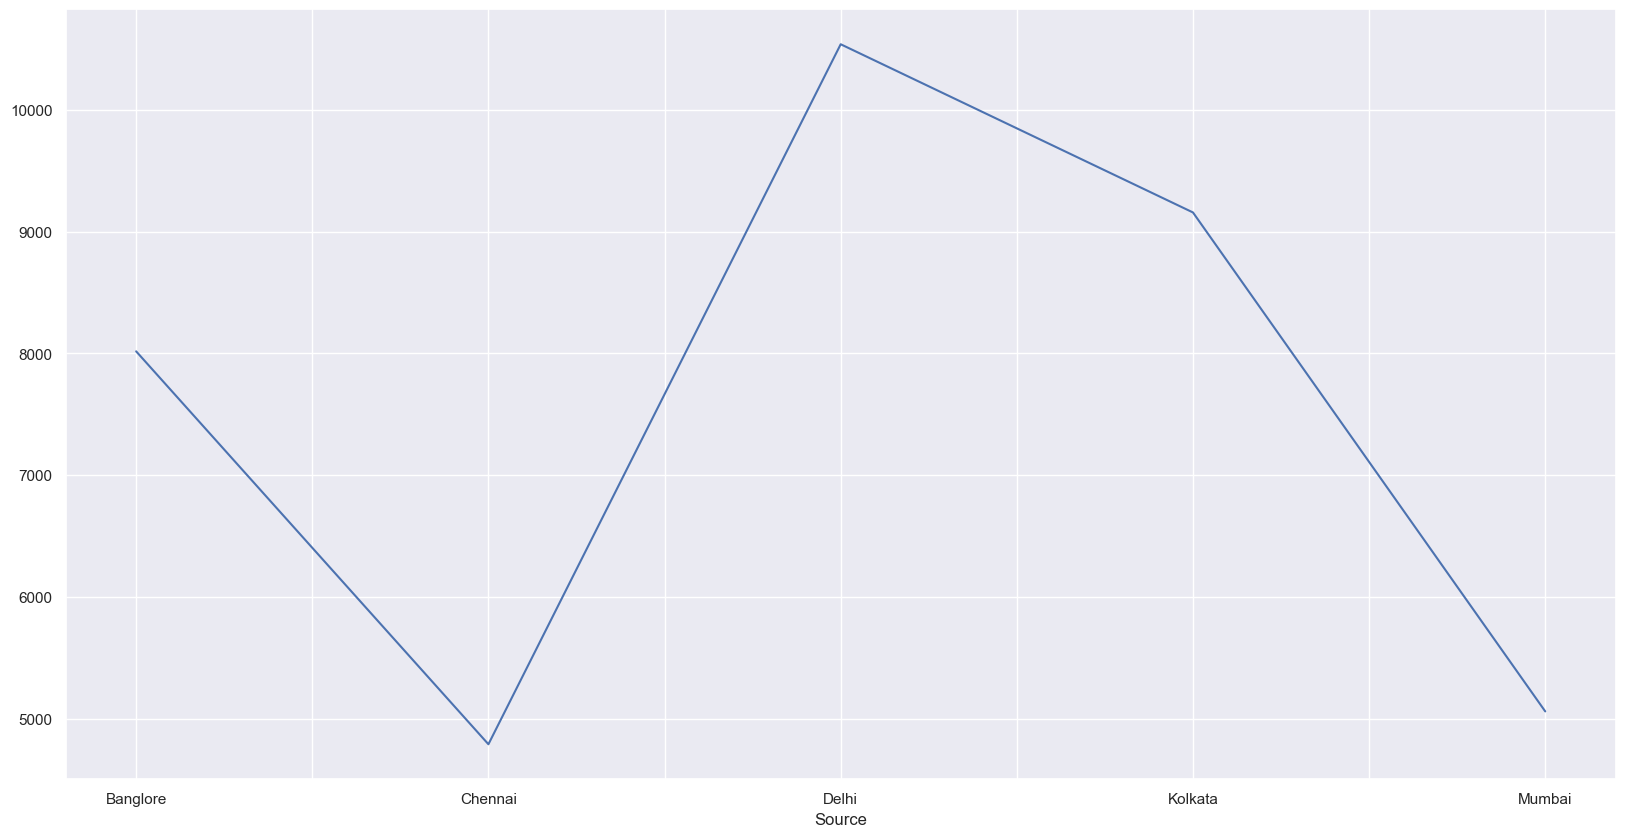

In [37]:
df1.groupby('Source')['Price'].mean().plot(figsize=(20,10))

In [38]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [39]:
# Create the boxen plot using Plotly
fig = px.box(df.sort_values('Price', ascending=False), x='Source', y='Price', color='Source',
             labels={'Source': 'Source', 'Price': 'Price'},
             title='Source vs Price')
fig.show()

# Source is Nominal Categorical data we will perform OneHotEncoding

In [40]:

Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

# check Destination value counts

In [41]:
df1["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# Destination is Nominal Categorical data we will perform OneHotEncoding

In [42]:

Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

# check Route column

In [43]:
df1["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

# Drop Route and Additional_Info columns because its unrelevant

In [44]:

df1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [45]:
df1["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Display Average price of all Total_Stops

<Axes: xlabel='Total_Stops'>

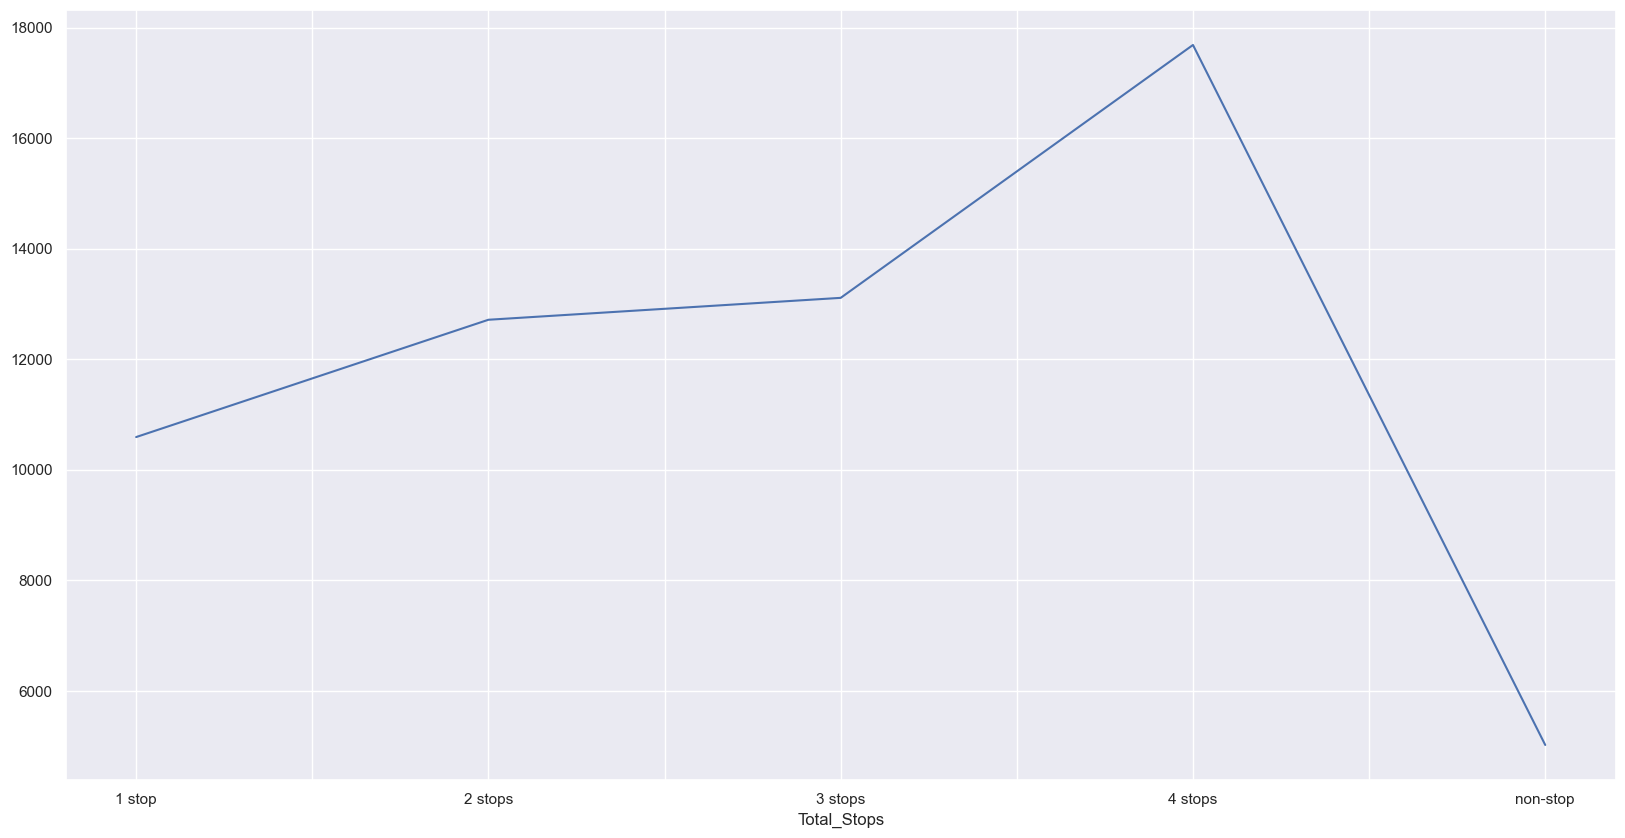

In [46]:
df1.groupby('Total_Stops')['Price'].mean().plot(figsize=(20,10))

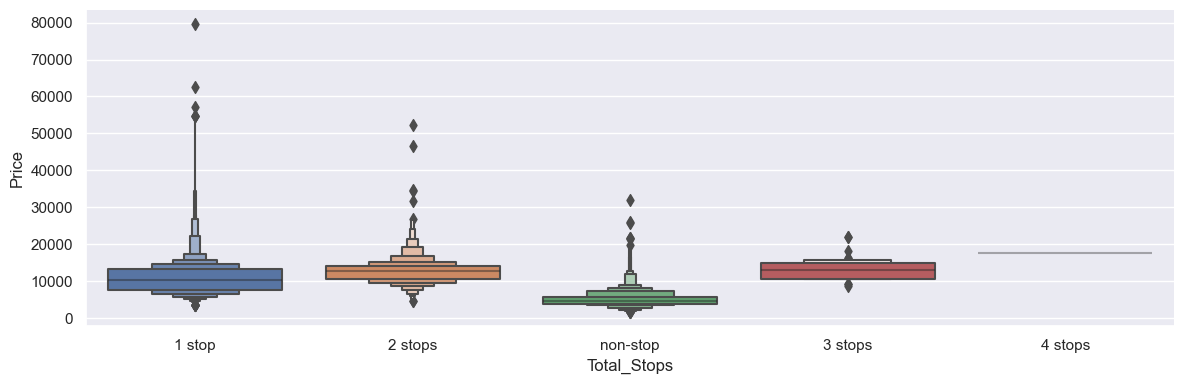

In [47]:
sns.catplot(y = "Price", x = "Total_Stops", data = df1.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [48]:
# Create the boxen plot using Plotly
fig = px.box(df1.sort_values('Price', ascending=False), x='Total_Stops', y='Price', color='Total_Stops', 
             labels={'Total_Stops': 'Total Stops', 'Price': 'Price'},
             title='Total Stops vs Price')
fig.show()

### Now replace categorical value in Total_stop with numeric value by manually

In [49]:

df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [50]:
df1.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

# Now concatenate all dummy data which we created with our orignal dataset 

In [51]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df1 = pd.concat([df1, Airline, Source, Destination], axis = 1)

In [52]:
df1.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  Airline_Air India  Airline_GoAir  \
0               2             50                  0              0   
1               7             25                  1              0   
2              19              0                  0              0   
3               5             25                  0              0   
4               4             45                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

# Drop Categorical columns from dataset 

In [53]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [54]:
df1.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [55]:
df1.shape

(10682, 30)

## Feature Selection



In [56]:
df1.shape

(10682, 30)

# Check all columns from dataset

In [57]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Create target and features set  

In [58]:
X = df1.drop('Price',axis=1)
y = df1.Price

In [59]:
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hours  Duration_mins  Airline_Air India  \
0           10               2             50                  0   
1           15               7             25                  1   
2           25              19              0                  0   
3           30               5             25                  0   
4           35               4             45                  0   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   
2              0               0                    1   
3              0               1                    0   
4              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

# Finds correlation between Independent and dependent attributes

In [60]:

plt.figure(figsize = (30,30))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Find the important Featuresn  using ExtraTreesRegressor

In [61]:

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

# print all features importances

In [62]:
print(selection.feature_importances_)

[2.23912345e-01 1.43417230e-01 5.39022012e-02 2.33444558e-02
 2.10338157e-02 2.78003036e-02 1.88575937e-02 1.24108972e-01
 1.81642691e-02 1.00157743e-02 1.86504186e-03 1.62377201e-02
 1.41714379e-01 6.74772987e-02 2.00361183e-02 8.65815541e-04
 2.99305648e-03 1.11307815e-04 4.96280242e-03 7.40566242e-05
 4.38285066e-04 8.43492856e-03 3.48362562e-03 7.55198064e-03
 1.07185040e-02 1.65006910e-02 6.76704237e-03 4.66604591e-04
 2.47437810e-02]


# plot graph of feature importances for better visualization


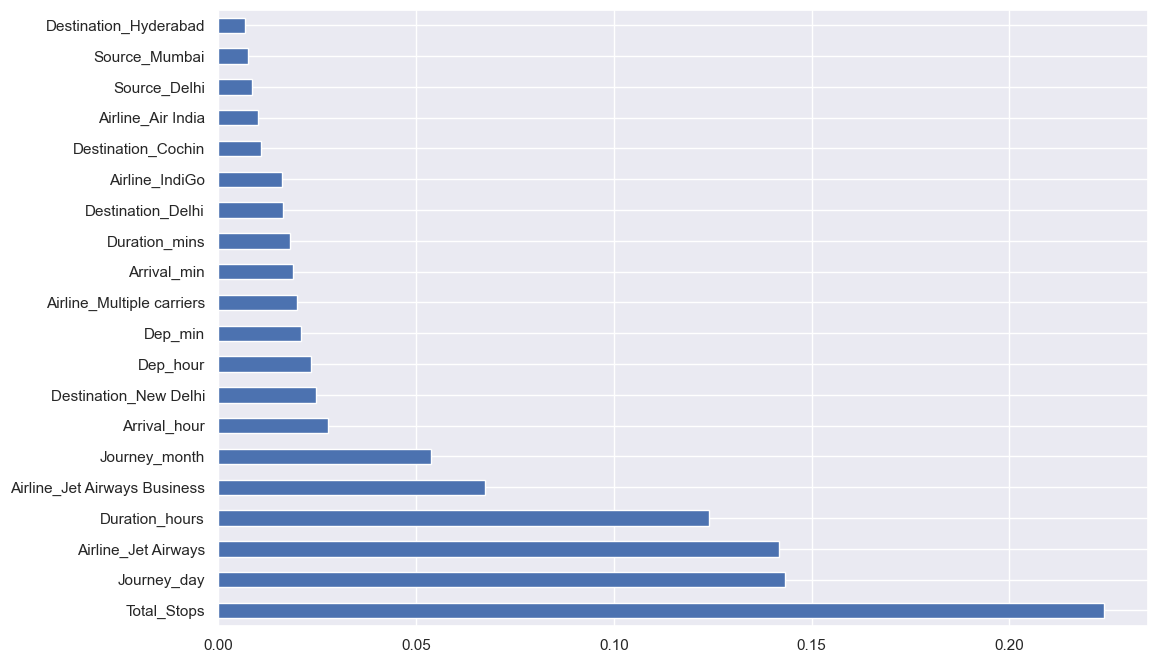

In [63]:

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# create training and testing data 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Apply Linear regression on training dataset

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model_li = LinearRegression()
model_li.fit(X_train,y_train)

LinearRegression()

# print trainging and testing score

In [67]:
model_li.score(X_train,y_train)

0.6240840020468166

In [68]:
model_li.score(X_test,y_test)

0.6195943729070101

# How try all diffrent regression algorithm and find the testing score

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor

In [74]:
model = [DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, AdaBoostRegressor, XGBRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,y_train)
    print(mod , '\tTrain Accuracy: ',reg.score(X_train,y_train), '\tTesting Accuracy: ', reg.score(X_test,y_test))
#     print(mod , 'accuracy',reg.score(X_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> 	Train Accuracy:  0.9692484150527355 	Testing Accuracy:  0.7307504494081436
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 	Train Accuracy:  0.9538415095520129 	Testing Accuracy:  0.796397489288555
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 	Train Accuracy:  0.7353783201025581 	Testing Accuracy:  0.5743709506218349
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 	Train Accuracy:  0.5250075524218354 	Testing Accuracy:  0.52104700524276
<class 'xgboost.sklearn.XGBRegressor'> 	Train Accuracy:  0.9353790824683148 	Testing Accuracy:  0.8463321179731759


# Now apply Kfold and cross validation technique

In [75]:
from sklearn.model_selection import KFold,cross_val_score

In [76]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('XGB', XGBRFRegressor()))


results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

KNN 0.5654993361648268
CART 0.6966585666268188
RF 0.806396306359597
AdaBoost 0.4210194666040207
XGB 0.7221475832360043


# Here we see RandomForestRegressor gives us best score so we can use RandomForest Regressor algorithm

In [77]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
y_pred = reg_rf.predict(X_test)

In [79]:
reg_rf.score(X_train, y_train)

0.9540748942816325

In [80]:
reg_rf.score(X_test, y_test)

0.7974549595953258

# Perform Hyper-prameter tuning using RandomizedSearchCV

In [81]:
from sklearn.model_selection import RandomizedSearchCV


# create list for all possible parameter

In [82]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [83]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation and  search across 100 different combinations

In [84]:


rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

#### Best parameters RandomForest

In [87]:
reg_rf = RandomForestRegressor(n_estimators = 700,
 min_samples_split= 15,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 20)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [88]:
y_pred = reg_rf.predict(X_test)

In [89]:
len(y_pred)

2137

# compare y_test and y_pred value using distplot

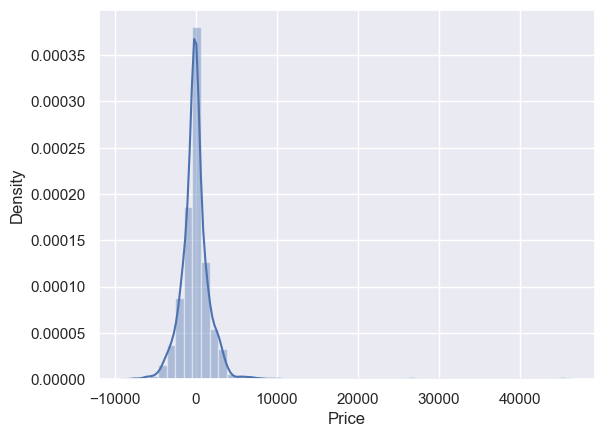

In [90]:
sns.distplot(y_test-y_pred)
plt.show()

# Plotting y_test against y_pred

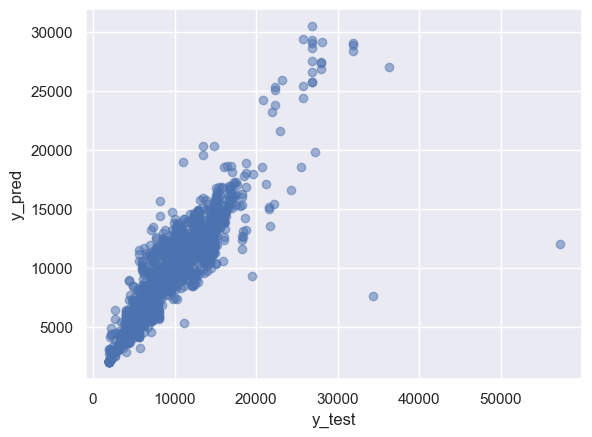

In [91]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [92]:
fig = px.scatter(x=y_test, y=y_pred, opacity=0.5)

fig.update_layout(title='Scatter Plot of y_test vs y_pred',
                  xaxis_title='y_test',
                  yaxis_title='y_pred')

# Model Evalution 

# check mean_absolute_error

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [95]:
mean_absolute_error(y_test, y_pred)

1164.905620025981

# check mean_squared_error

In [96]:
mean_squared_error(y_test, y_pred)

4040673.167951579

# check r2_score

In [97]:
r2_score(y_test, y_pred)

0.812602605836637

# Hyper-parameter tuning - XGBRegressor

In [98]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
xgb_model = XGBRegressor()
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error')

In [101]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   scoring='neg_mean_squared_error')

In [102]:
# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [103]:
reg_xgb = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0)
reg_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
y_pred = reg_xgb.predict(X_test)

In [105]:
r2_score(y_test, y_pred)

0.8579671127534851

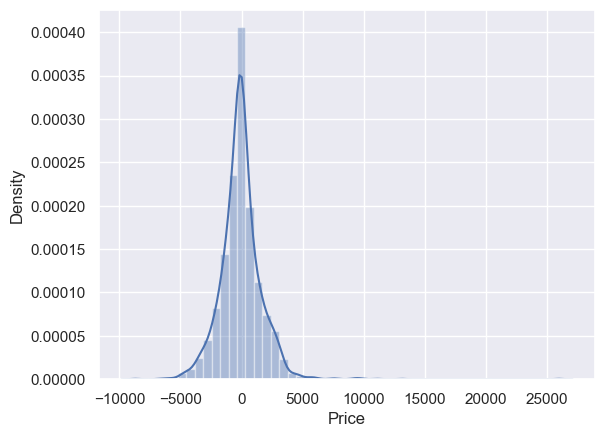

In [106]:
sns.distplot(y_test-y_pred)
plt.show()

# And scatter plot

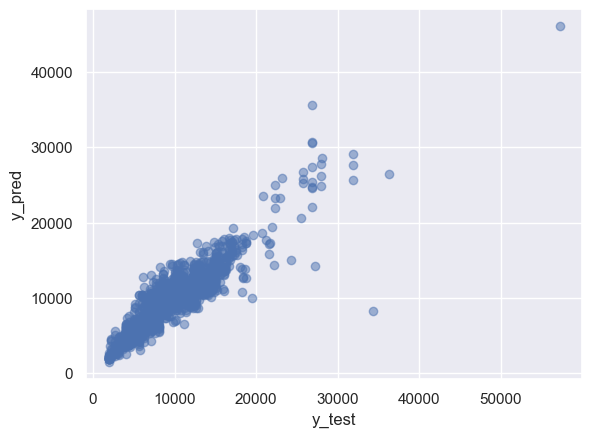

In [107]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [108]:
fig = px.scatter(x=y_test, y=y_pred, opacity=0.5)

fig.update_layout(title='Scatter Plot of y_test vs y_pred',
                  xaxis_title='y_test',
                  yaxis_title='y_pred')

# Model Evalution 

# check mean_absolute_error

In [109]:
mean_absolute_error(y_test, y_pred)

1174.2305076502728

# check mean_squared_error

In [110]:
mean_squared_error(y_test, y_pred)

3062521.114692673

# check r2_score

In [111]:
r2_score(y_test, y_pred)

0.8579671127534851